# Lab - Interpolação Linear

Esta tarefa explora a interpolação a partir do sinal decimado, numericamente e fazendo inserção de zeros seguida de convolução. Compara a resposta em frequência deste processo com a resposta em frequencia teórica.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [2]:
from pylab import *
from scipy.signal import *

Considere a sequencia

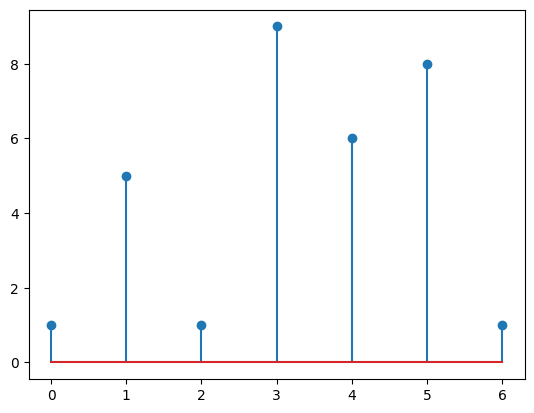

In [3]:
x=[1, 5, 1, 9, 6, 8, 1]
stem(x)
show()

a) Obtenha a sequencia xi, como sendo a interpolação linear com 3 novas amostras entre cada amostra de x, usando a função interp(). 
Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

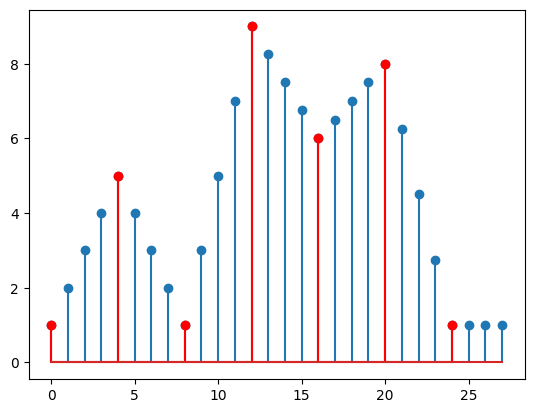

In [66]:
n = 3
n = n+1
xi = n*arange(0, len(x))
xval=arange(len(x)*n)
yval = interp(xval, xi, x)
stem(xval, yval)
stem(xi,x, "ro")
show()

b) Obtenha a sequencia xe como a expansão da sequencia x por um fator L=4, ou seja, inserindo 3 zeros entre cada amostra de x. Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

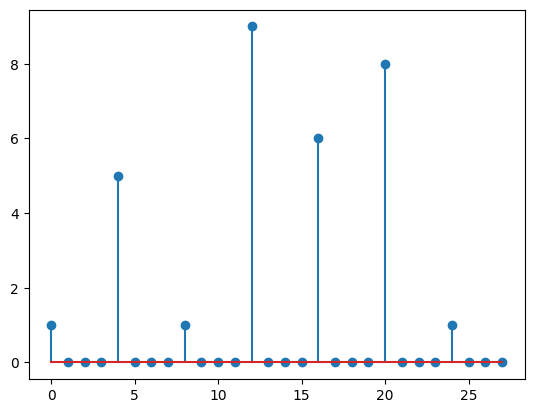

In [67]:
n = 3
n = n+1
L = 4
xe=arange(len(x)*n)
ye = np.zeros(xval.shape)
ye[::L]=x
stem(xe, ye)
show()

c) Considere uma sequencia resposta ao impulso hlin de um sistema que realize a interpolação linear.

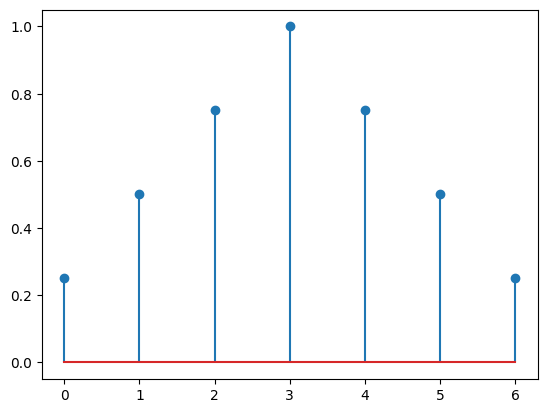

In [68]:
n = arange(7)
yh = (4-abs(n-3))/4
stem(n, yh)
hlim = yh

d) Obtenha a sequecia xei como a interpolação da sequencia xe pela convolução com hlin. Plote xei com stem e x com simbolo vermelho.

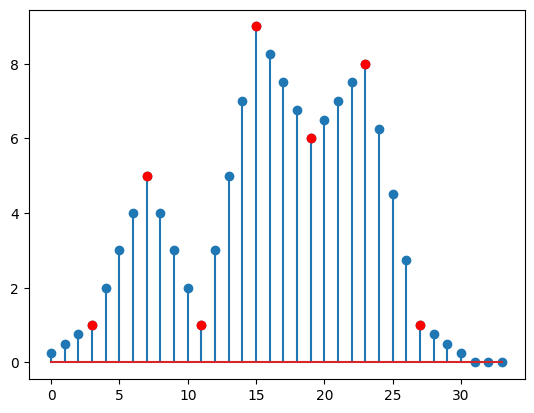

In [76]:
xei = convolve(ye, hlim)
stem(xei)
plot(xi+3,x, "ro")
plt.show()


e) Obtenha Hlin, 200 valores para $w$ entre 0 e $2\pi$ da função de transferencia teórica do filtro que corresponde à interpolação linear:<br>
$\large H_{lin}(e^{j w})=\frac{1}{L}(\frac{\sin(w L / 2)}{\sin(w / 2)})^2$ <br>
Plote o valor absoluto de $H_{lin}$ juntamente com 20 valores da transformada de Fourier de hlin (HLIN, com símbolo vermelho).<br>
Ignore a mensagem de alerta "invalid value" devido a divisão 0 / 0, ou então use seterr(invalid='ignore').


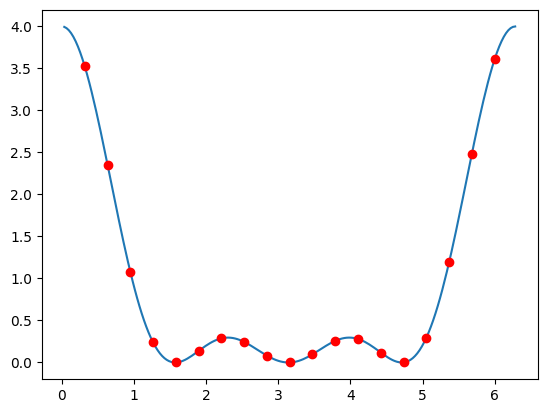

In [44]:
w = linspace(0, 2*pi, 200)
seterr(invalid='ignore')
Hlin = (1/L)*((sin(w*L/2)/sin(w/2))**2)
plot(w, abs(Hlin))
# legend(label="Hlin")
plot(w[::10], Hlin[::10], 'ro')
# legend(label="Hin")
plt.show()

f) Qual o valor teórico de Hlin para w=0, que não pode ser calculado numericamente (divisão 0 / 0) ?

de forma analitica é possivel ver que o resultado tende a 4 em w = 0 e 2 $\pi$

Calulando o limite de w tendendo a zero temos:


$
\lim_{{w \to 0}} H_{lin}(e^{j w}) = \lim_{{w \to 0}} \frac{1}{L} \left( \frac{\sin(w L / 2)}{\sin(w / 2)} \right)^2
$

Neste limite, estamos investigando o comportamento da função $ H_{lin}(e^{j w})$ à medida que $ w $ se aproxima de 0. Para calcular este limite, podemos usar a regra de L'Hôpital, que nos permite avaliar limites de funções trigonométricas.

Aplicando a regra de L'Hôpital duas vezes, obtemos:

$
\lim_{{w \to 0}} H_{lin}(e^{j w}) = \frac{1}{L} \left( \frac{L/2}{1/2} \right)^2 = \frac{1}{L} (L^2) = L
$

Portanto, o limite de $H_{lin}(e^{j w})$ à medida que  w  tende a 0 é igual a L.

Logo L é igual a 4.